In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import ast
pd.options.mode.chained_assignment = None

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

## Preparing cleaned_data.csv for modeling

In [2]:
data = pd.read_csv("/Users/alidoxey/Downloads/213Project-master 4/cleaned_data.csv")

In [3]:
data.head()

,Unnamed: 0,comments,duration,languages,published_date,speaker_occupation,title,views,Positive,Negative,...,Scientific Fields_tag,media/entertainment_tag,Organizing/Perceiving Information_tag,Middle East_tag,Epidemics_tag,Outer-Space_tag,Vices/Prejudices_tag,exploration_tag,robots/prosthetics_tag,animals/organisms_tag
0,0,4553,1164,60,1151367060,Author/educator,Do schools kill creativity?,47227110,91538,1138,...,0,0,0,0,0,0,0,0,0,0
1,1,265,977,43,1151367060,Climate advocate,Averting the climate crisis,3200520,2169,564,...,1,0,0,0,0,0,0,0,0,0
2,2,124,1286,26,1151367060,Technology columnist,Simplicity sells,1636292,2327,351,...,0,1,1,0,0,0,0,0,0,0
3,3,200,1116,35,1151367060,Activist for environmental justice,Greening the ghetto,1697550,3487,156,...,0,0,0,0,0,0,0,0,0,0
4,4,593,1190,48,1151440680,Global health expert; data visionary,The best stats you've ever seen,12005869,25062,310,...,1,1,1,1,0,0,0,0,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 28 columns):
Unnamed: 0                               2550 non-null int64
comments                                 2550 non-null int64
duration                                 2550 non-null int64
languages                                2550 non-null int64
published_date                           2550 non-null int64
speaker_occupation                       2544 non-null object
title                                    2550 non-null object
views                                    2550 non-null int64
Positive                                 2550 non-null int64
Negative                                 2550 non-null int64
Moderate                                 2550 non-null int64
related_views                            2550 non-null int64
event_class                              2550 non-null object
Humanity/Progress_tag                    2550 non-null int64
arts/creativity_tag                 

In [5]:
target = data.views

In [15]:
#an attempt at removing outliers-- Maria said we don't really have to but I think it might help with some visualizations
"""
mean = np.mean(data, axis=0)
sd = np.std(data, axis=0)

no_outliers_data = [x for x in data if (x > mean - 2 * sd)]
no_outliers_data = [x for x in no_outliers_data if (x < mean + 2 * sd)]
"""

'\nmean = np.mean(data, axis=0)\nsd = np.std(data, axis=0)\n\nno_outliers_data = [x for x in data if (x > mean - 2 * sd)]\nno_outliers_data = [x for x in no_outliers_data if (x < mean + 2 * sd)]\n'

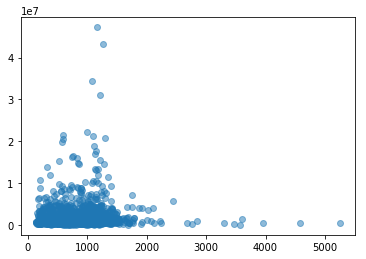

In [14]:
plt.scatter(data.duration, target, alpha=0.5)

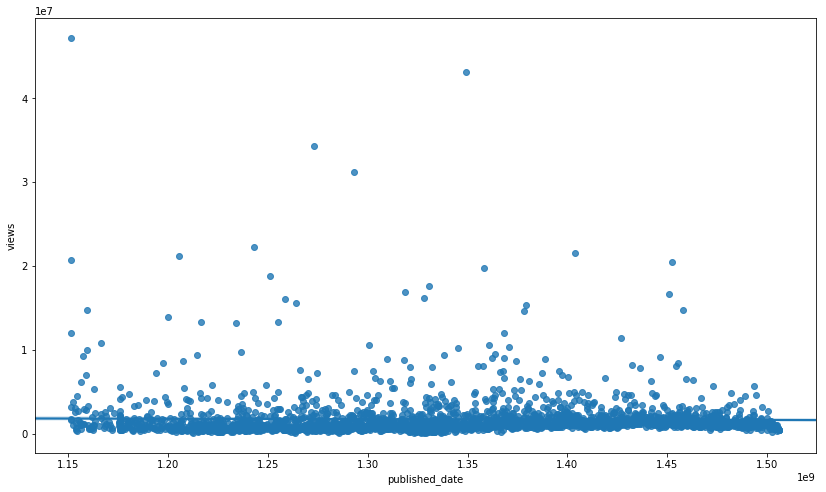

In [16]:
f, ax = plt.subplots(figsize = (14,8))
sns.regplot(x="published_date", y="views", data=data)

In [7]:
df = data.drop(['Unnamed: 0', 'speaker_occupation', 'title', 'views'], axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 24 columns):
comments                                 2550 non-null int64
duration                                 2550 non-null int64
languages                                2550 non-null int64
published_date                           2550 non-null int64
Positive                                 2550 non-null int64
Negative                                 2550 non-null int64
Moderate                                 2550 non-null int64
related_views                            2550 non-null int64
event_class                              2550 non-null object
Humanity/Progress_tag                    2550 non-null int64
arts/creativity_tag                      2550 non-null int64
philanthropy/religion_tag                2550 non-null int64
music_tag                                2550 non-null int64
Global issues_tag                        2550 non-null int64
Scientific Fields_tag                 

In [9]:
df = pd.get_dummies(df)

In [10]:
df.head()

,comments,duration,languages,published_date,Positive,Negative,Moderate,related_views,Humanity/Progress_tag,arts/creativity_tag,...,exploration_tag,robots/prosthetics_tag,animals/organisms_tag,event_class_Other,event_class_TEDGlobal,event_class_TEDNYC,event_class_TEDSalon,event_class_TEDWomen,event_class_TEDx,event_class_Yearly TED Conference
0,4553,1164,60,1151367060,91538,1138,1174,3027062,1,1,...,0,0,0,0,0,0,0,0,0,1
1,265,977,43,1151367060,2169,564,203,1118767,1,0,...,0,0,0,0,0,0,0,0,0,1
2,124,1286,26,1151367060,2327,351,146,1846195,1,0,...,0,0,0,0,0,0,0,0,0,1
3,200,1116,35,1151367060,3487,156,85,776189,1,0,...,0,0,0,0,0,0,0,0,0,1
4,593,1190,48,1151440680,25062,310,248,1907337,1,0,...,0,0,0,0,0,0,0,0,0,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 30 columns):
comments                                 2550 non-null int64
duration                                 2550 non-null int64
languages                                2550 non-null int64
published_date                           2550 non-null int64
Positive                                 2550 non-null int64
Negative                                 2550 non-null int64
Moderate                                 2550 non-null int64
related_views                            2550 non-null int64
Humanity/Progress_tag                    2550 non-null int64
arts/creativity_tag                      2550 non-null int64
philanthropy/religion_tag                2550 non-null int64
music_tag                                2550 non-null int64
Global issues_tag                        2550 non-null int64
Scientific Fields_tag                    2550 non-null int64
media/entertainment_tag                

In [ ]:
#drop features we don't know about beforehand
df = df.drop(['comments', 'languages', 'Positive', 'Negative', 'Moderate', 'related_views'], axis=1)

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

## Linear Regression

In [ ]:
#Basic Linear Regression
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(X_train, y_train)
predictions = linear_regression_model.predict(X_train)
mse = mean_squared_error(y_train, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

In [ ]:
#change to RMSE?
#Linear Regression with Grid Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

param_dist = {"eta0": [ .001, .003, .01, .03, .1, .3, 1, 3]}

linear_regression_model = SGDRegressor(tol=.0001, max_iter=10000)

grid_search = GridSearchCV(linear_regression_model, param_grid=param_dist, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best Parameters: {}".format(grid_search.best_params_))
print("Best RMSE: {}".format(np.sqrt(np.absolute(grid_search.best_score_))))

## Regularization

In [ ]:
from sklearn.linear_model import ElasticNetCV

# l1 ratio of zero is l2 and visa-versa 
# alphas are how much to weight regularization
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
print("Train RMSE: {}".format(np.sqrt(mean_squared_error(y_train, train_predictions))))
print("Test RMSE: {}".format(np.sqrt(mean_squared_error(y_test, test_predictions))))

## K-Nearest Neighbors Regressor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

In [ ]:
# Code from K Nearest Neighbors lecture notes
reg = KNeighborsRegressor()
knn_gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
knn_gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(knn_gridsearch.best_params_))
y_pred_train = knn_gridsearch.predict(X_train)
y_pred_test = knn_gridsearch.predict(X_test)
print("Train RMSE: {}\tTest RMSE: {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train)),
                                           np.sqrt(mean_squared_error(y_test, y_pred_test))))

## Random Forest Regression

## NEXT STEPS

1. Convert timestamp to date, visualize views by date published
2. Try more models
3. Maybe make a graph comparing RMSEs for each model
4. Compare coefficients to find best predictors